In [1]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis = 1)

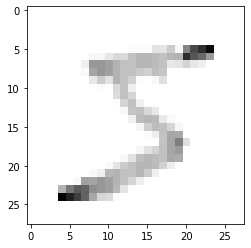

5


In [3]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0], cmap = "Greys")
plt.show()
#print(x_train[0])
print(y_train[0])

`tf.keras.models.Sequential()` is a model of a neural network that allows us to add layers that are all feed-forward in nature (like most of the normal Neural Networks that we see)

`tf.keras.layers.Flatten()` will be the layer that we will use to take the input from the image. We will need to flatten our 28\*28 image into a single flattened layer (by, say, reshaping the image using numpy).

`tf.keras.layers.Dense(128, activation = tf.nn.relu)` will add a layer containing 128 neurons whose activation function is the `tf.nn.relu` function.

(It's just the ReLU function, which is available in the tf.nn library; you could have written your own ReLU function and filled it in here)

`tf.keras.layers.Dense(10, activation = tf.nn.softmax)` adds the output layer for our neural network. This contains 10 neural networks, and since it needs to return a probability whether a given number is the output, it therefore needs the softmax function, which, again, we get at the tf.nn library.

We are using 2 hidden layers in between the input layer (flatten) and the output layer (the one that should tell us which number the input is)

In [5]:
# Neural Network Model

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation = tf.nn.softmax))

`model.compile` basically lets us choose the optimization/cost function (like gradient descent or something like that) and the loss (i.e. something like mean absolute error or mean squared error).

Now, we have chosen the optimizer function as `'adam'` which is like a much better replacement for the gradient descent (kinda like how ReLU is a better replacement for sigmoid).

In [6]:
model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

In [7]:
model.fit(x_train, y_train, epochs = 5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 5s 87us/sample - loss: 0.2665 - accuracy: 0.9218
Epoch 2/5
60000/60000 [==============================] - 4s 69us/sample - loss: 0.1083 - accuracy: 0.9667
Epoch 3/5
60000/60000 [==============================] - 4s 69us/sample - loss: 0.0733 - accuracy: 0.9769
Epoch 4/5
60000/60000 [==============================] - 5s 75us/sample - loss: 0.0539 - accuracy: 0.9821
Epoch 5/5
60000/60000 [==============================] - 4s 72us/sample - loss: 0.0400 - accuracy: 0.9872


In [8]:
val_loss, val_acc = model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 64us/sample - loss: 0.0832 - accuracy: 0.9757


In [9]:
model.save('num_recognizer.model')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: num_recognizer.model/assets


In [11]:
new_model = tf.keras.models.load_model('num_recognizer.model')

In [13]:
import numpy as np
predictions = new_model.predict(np.array(x_test)) #remember that predict always takes
# a list as its input

In [15]:
print(predictions)

[[3.60146878e-11 3.30602545e-09 2.67795230e-07 ... 9.99998212e-01
  1.08296865e-08 1.11904719e-09]
 [2.63963074e-10 3.22236010e-05 9.99963880e-01 ... 1.98350477e-07
  1.08948195e-09 8.73012824e-16]
 [1.63879559e-08 9.99661088e-01 2.67327650e-05 ... 1.26233601e-04
  1.75645691e-04 3.75255212e-07]
 ...
 [1.54952360e-07 1.03055681e-05 6.22935925e-09 ... 7.96001405e-05
  1.48713923e-04 4.48144914e-04]
 [1.54904569e-07 3.70266973e-09 1.57170432e-09 ... 1.03144806e-07
  1.69738755e-03 5.79991744e-09]
 [6.50363319e-08 1.69625043e-08 2.41595853e-06 ... 4.15487228e-10
  4.82070709e-06 2.11145967e-09]]


7


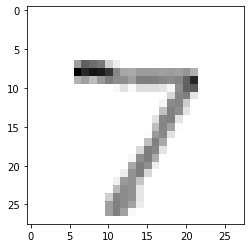

Press enter to continue... 


2


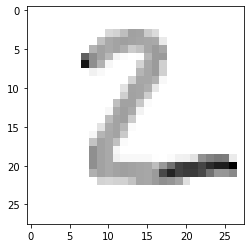

Press enter to continue... 


1


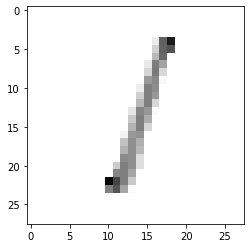

Press enter to continue... 


0


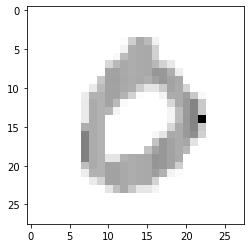

Press enter to continue... 


4


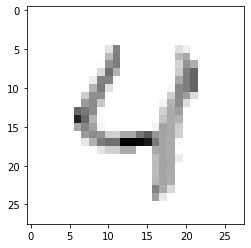

Press enter to continue... 


1


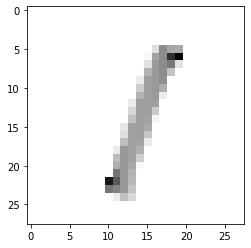

Press enter to continue... 


4


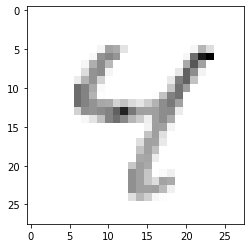

Press enter to continue... 


9


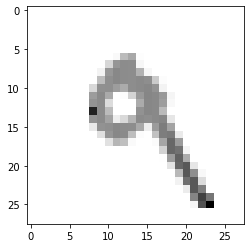

Press enter to continue... 


5


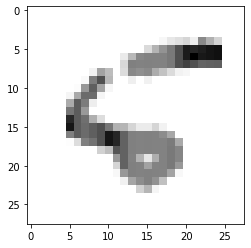

Press enter to continue... 


9


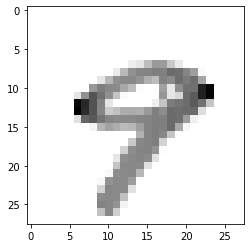

Press enter to continue... 


0


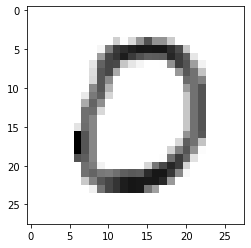

Press enter to continue... 


6


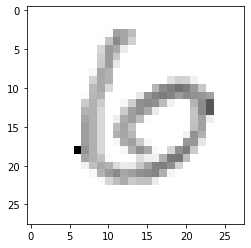

Press enter to continue... 


9


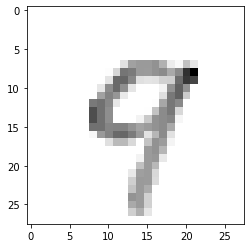

Press enter to continue... 


0


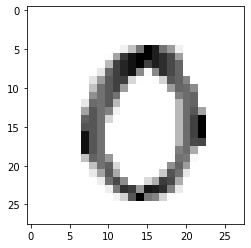

Press enter to continue... 


1


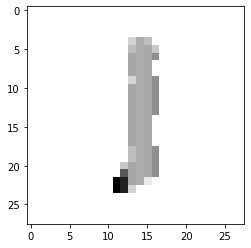

Press enter to continue... 


5


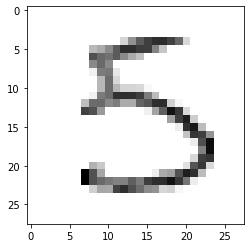

Press enter to continue... 


9


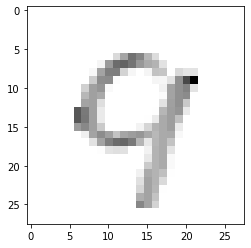

Press enter to continue... 


7


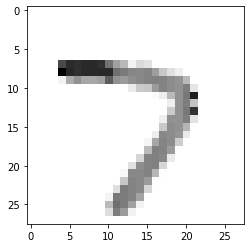

Press enter to continue... 


3


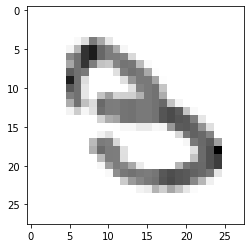

Press enter to continue... 


4


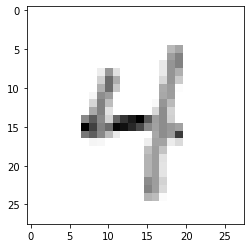

Press enter to continue... 


9


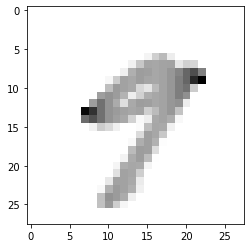

Press enter to continue... 


6


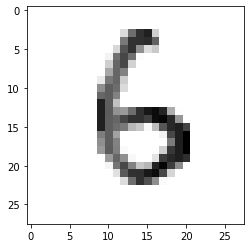

Press enter to continue... 


6


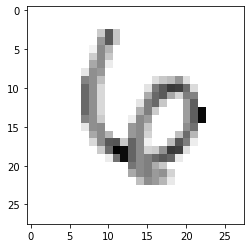

Press enter to continue... 


5


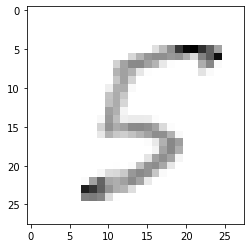

Press enter to continue... 


4


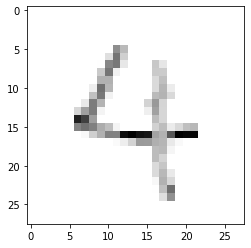

Press enter to continue... 


0


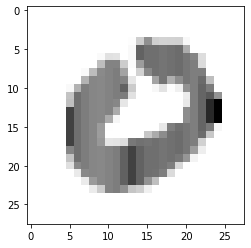

Press enter to continue... 


7


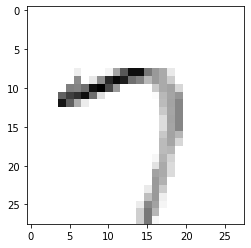

Press enter to continue... 


4


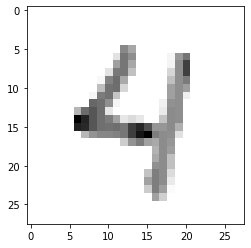

Press enter to continue... 


0


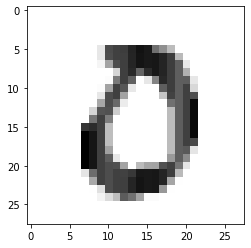

Press enter to continue... 


1


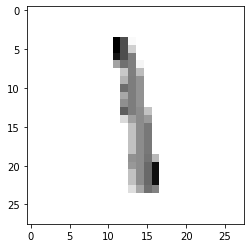

Press enter to continue... 


3


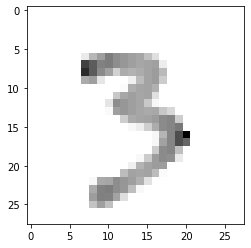

Press enter to continue... 


1


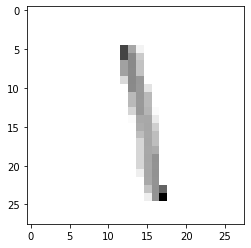

Press enter to continue... 


3


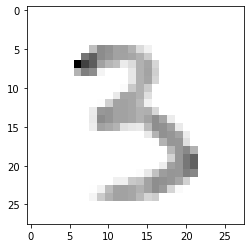

Press enter to continue... 


4


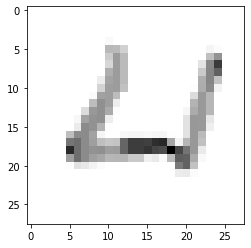

Press enter to continue... 


7


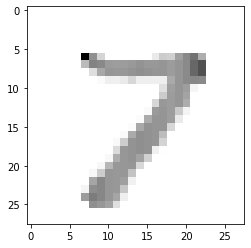

Press enter to continue... 


2


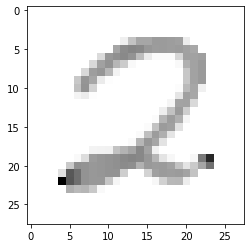

Press enter to continue... 


7


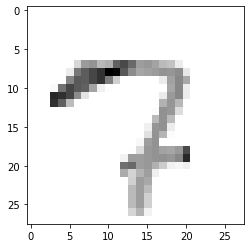

Press enter to continue... 


1


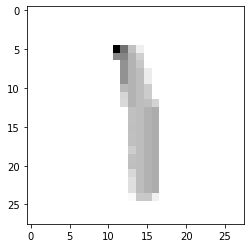

Press enter to continue... 


2


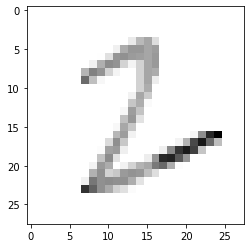

Press enter to continue... 


1


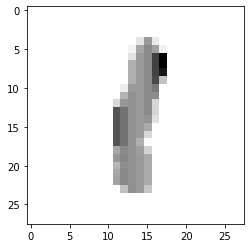

Press enter to continue... 


1


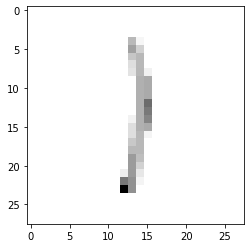

KeyboardInterrupt: 

In [14]:
for n,i in enumerate(predictions):
    print(np.argmax(i))
    plt.imshow(x_test[n], cmap = plt.cm.binary)
    plt.show()
    input("Press enter to continue...")